# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
caminho_arquivo = 'C:\\Users\\55119\\OneDrive\\Documentos\\curso EBAC\\Tarefas\\Módulos exercícios\\Ciências de Dados\\previsao_de_renda.csv'

df = pd.read_csv(caminho_arquivo)

df = df.drop(['Unnamed: 0', 'mau'], axis=1)

df

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,1193.29
14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,2519.18
14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,1586.85
14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,6975.39


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

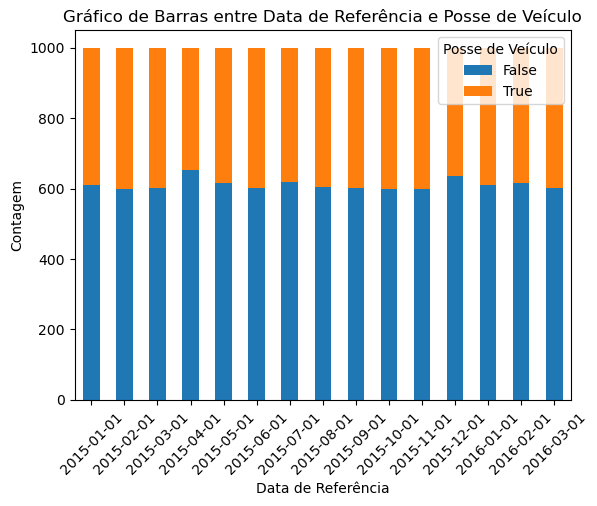

In [4]:
data_counts = df.groupby(['data_ref', 'posse_de_veiculo']).size().unstack()

data_counts.plot(kind='bar', stacked=True)

plt.xlabel('Data de Referência')
plt.ylabel('Contagem')
plt.title('Gráfico de Barras entre Data de Referência e Posse de Veículo')
plt.legend(title='Posse de Veículo', loc='upper right')
plt.xticks(range(len(data_counts.index)), data_counts.index, rotation=45)

plt.show()

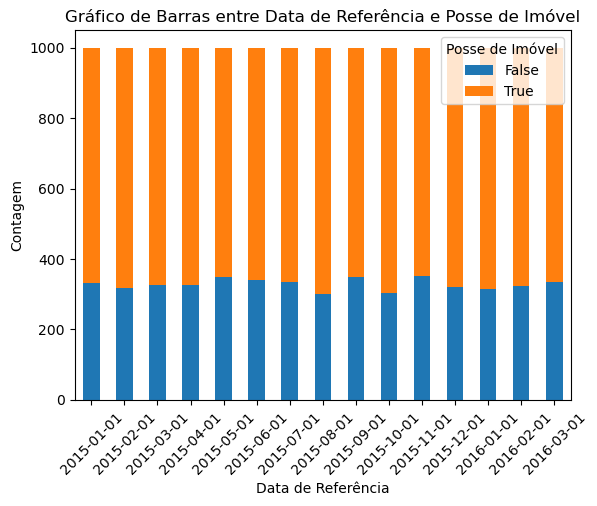

In [5]:
data_counts1 = df.groupby(['data_ref', 'posse_de_imovel']).size().unstack()

data_counts1.plot(kind='bar', stacked=True)

plt.xlabel('Data de Referência')
plt.ylabel('Contagem')
plt.title('Gráfico de Barras entre Data de Referência e Posse de Imóvel')
plt.legend(title='Posse de Imóvel', loc='upper right')
plt.xticks(range(len(data_counts1.index)), data_counts1.index, rotation=45)

plt.show()

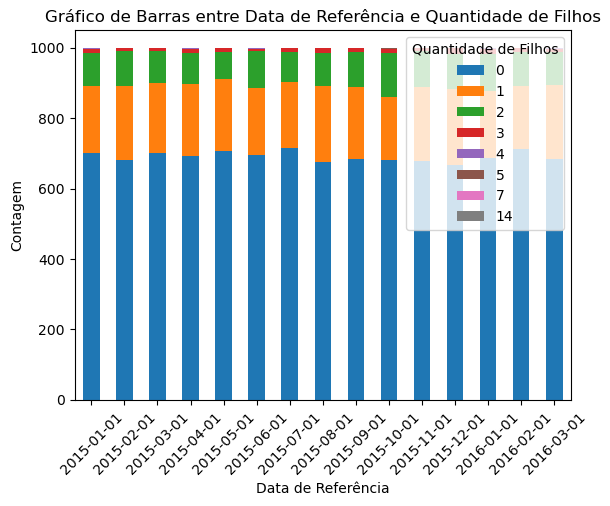

In [6]:
data_counts2 = df.groupby(['data_ref', 'qtd_filhos']).size().unstack()

data_counts2.plot(kind='bar', stacked=True)

plt.xlabel('Data de Referência')
plt.ylabel('Contagem')
plt.title('Gráfico de Barras entre Data de Referência e Quantidade de Filhos')
plt.legend(title='Quantidade de Filhos', loc='upper right')
plt.xticks(range(len(data_counts2.index)), data_counts2.index, rotation=45)

plt.show()

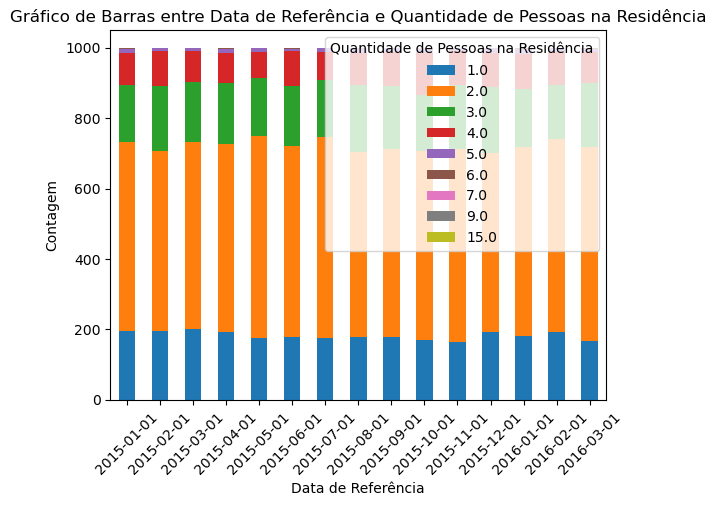

In [7]:
data_counts3 = df.groupby(['data_ref', 'qt_pessoas_residencia']).size().unstack()

data_counts3.plot(kind='bar', stacked=True)

plt.xlabel('Data de Referência')
plt.ylabel('Contagem')
plt.title('Gráfico de Barras entre Data de Referência e Quantidade de Pessoas na Residência')
plt.legend(title='Quantidade de Pessoas na Residência', loc='upper right')
plt.xticks(range(len(data_counts3.index)), data_counts3.index, rotation=45)

plt.show()

Pela a minha análise, me parece estável a distribuição das variáveis pelo tempo.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

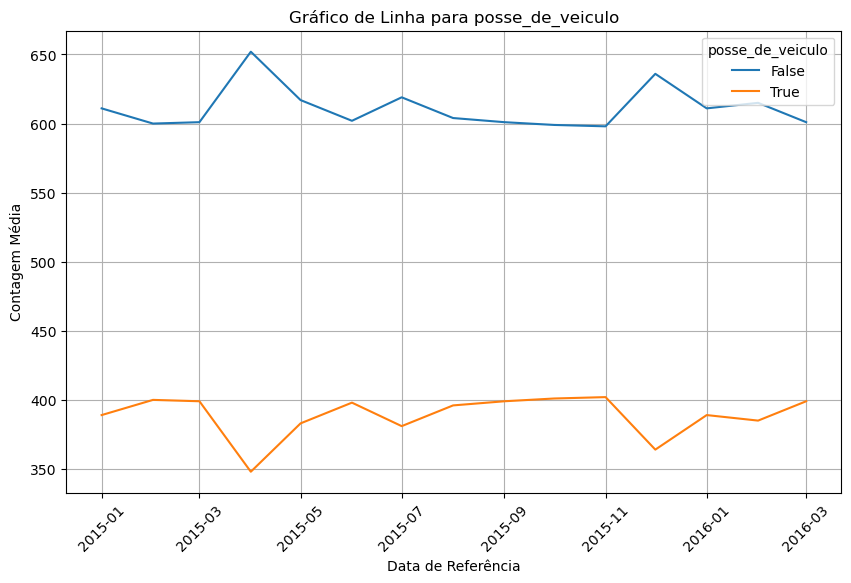

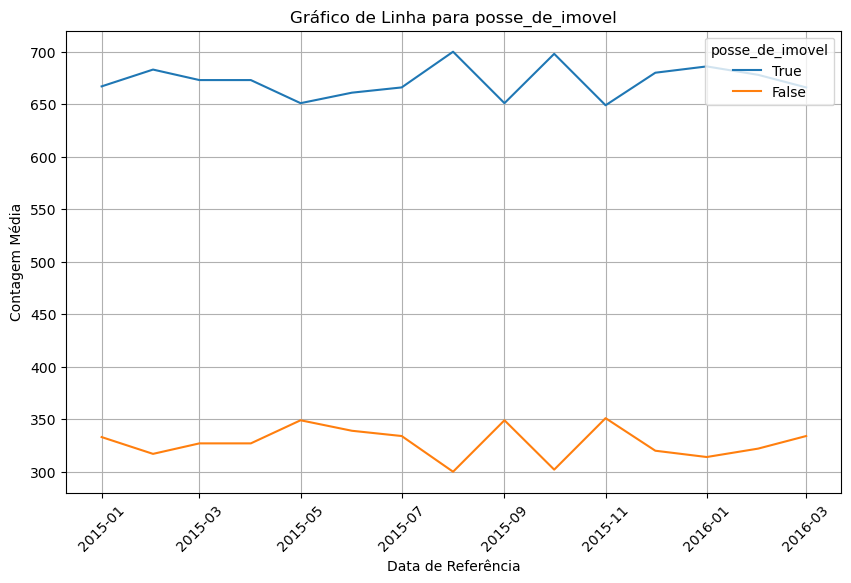

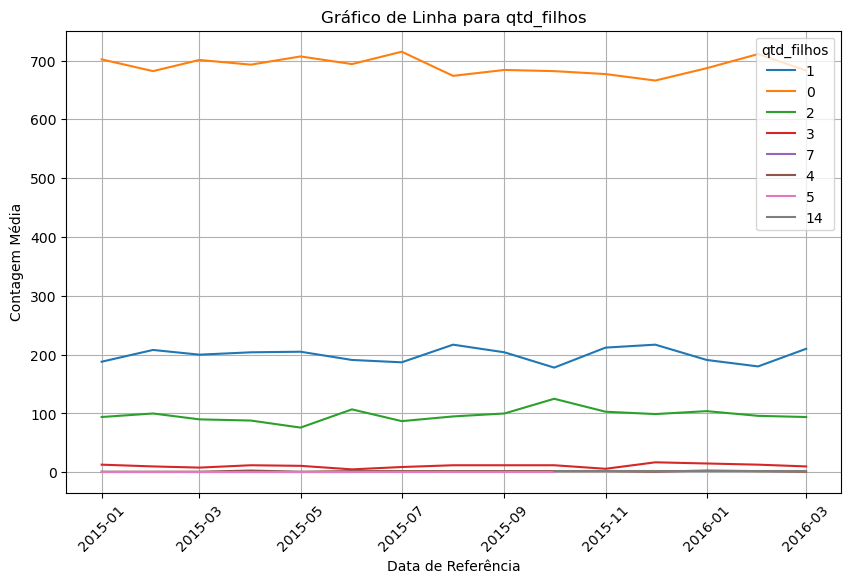

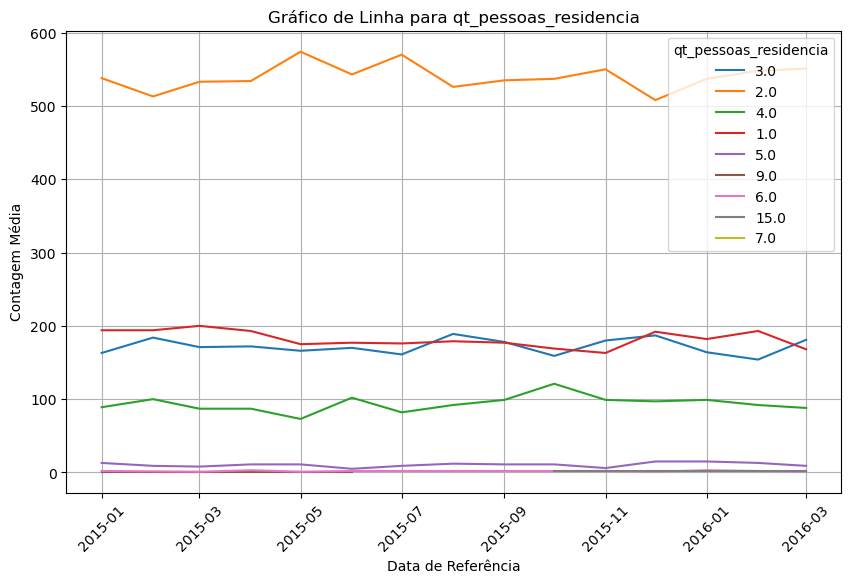

In [9]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

variaveis_qualitativas = ['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'qt_pessoas_residencia']

for variavel in variaveis_qualitativas:
    plt.figure(figsize=(10, 6))
    for nivel in df[variavel].unique():
        media_por_data = df[df[variavel] == nivel].groupby('data_ref')[variavel].count()
        plt.plot(media_por_data.index, media_por_data, label=nivel)

    plt.xlabel('Data de Referência')
    plt.ylabel('Contagem Média')
    plt.title(f'Gráfico de Linha para {variavel}')
    plt.legend(title=variavel, loc='upper right')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.show()